In [1]:
#libraries for visualization and organization
import pandas as pd

#libraries for plotting and graphing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()
from pylab import *
from scipy import special, optimize

#libraries for modelling
import scipy
from scipy.stats import norm
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LinearRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

#libraries for cleaning data, imputing values
from sklearn.preprocessing import Imputer
import sklearn as sk

#silencing warnings and other rubbish
import warnings
warnings.filterwarnings("ignore")


C:\Users\Malconius\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Loading in our dataset -- housing data. 

In [2]:
#loading in our training dataset -- leaving testing set alone until we need it later. 
train = pd.read_csv(r"C:\Users\Malconius\Documents\Econ213R\hw2\train.csv")
train.shape #finding number of observations before we append the test set to it in order to create traintest

(1460, 81)

In [3]:
test =  pd.read_csv(r"C:\Users\Malconius\Documents\Econ213R\hw2\test.csv")
test.shape
Id = test.Id

In [4]:
traintest = train.append(test).reset_index(drop=True)
traintest.shape

(2919, 81)

Let's look at some surface level descriptive data:

In [5]:
#finding some descriptive states about our dataset. 
pd.set_option('max_columns', 400)
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


A few variables look concerning, namely MasVnrArea (lots of 0 values), BsmtFinSF1, BsmtFinSF2, and a few other variables. 
I don't like those 0 values in so many percentiles, so I think we have more than a few missing observations. Before we get too concerned about this, I'm going to look at variables with missing values before I worry about other problems with the data.

In [7]:
train.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
dtype: int64

Because a few of those variables are missing for almost the entirety of our dataset, I am going to drop them. Variables in this category are PoolQC, MiscFeature, Alley, Fence, and FireplaceQu. 

For variables LotFrontage and below, I think we can reasonably create data that will help us make use of the existing data we have. 

In [9]:
#dropping widely missing variables
train = train.drop(["PoolQC","MiscFeature","Alley", "Fence"],axis = 1)

In [10]:
#dropping widely missing variables
test = test.drop(["PoolQC","MiscFeature","Alley", "Fence"], axis=1)

In [11]:
#checking to find remaining missing values
train.isnull().sum().sort_values(ascending=False).head(14)

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
dtype: int64

In [12]:
#checking to find remaining missing values
test.isnull().sum().sort_values(ascending=False).head(14)

FireplaceQu     730
LotFrontage     227
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
dtype: int64

I will wait until later to create an accurately imputed value for LotFrontage, so let's move onto the Garage variables for now. 

Without bothering to check, I am going to assume that the same observations missing one of the garage variables are also missing the others. That doesn't bother me too much, especially considering that they are less than 7% of our dataset. Looking at the variable descriptions provided with the data, we can see that missing garage variables means that the house does not have a garage. So we can mark these as "None" to match the variable codification descriptions. 

In [13]:
#garage* variables -- taking a shot in the dark and guessing that all 81 houses are the same missing these variables
#missing garage variables indicate no garage, filling variables.
train[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]] = train[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]].fillna("None")

In [14]:
#garage* variables -- taking a shot in the dark and guessing that all 81 houses are the same missing these variables
#missing garage variables indicate no garage, filling variables.
test[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]] = test[["GarageFinish", "GarageType", "GarageCond", "GarageQual", "GarageYrBlt"]].fillna("None")

In [15]:
#looks like the 81 houses shared the missing values
test.isnull().sum().sort_values(ascending=False).head(9)

FireplaceQu     730
LotFrontage     227
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
dtype: int64

In [16]:
#looks like the 81 houses shared the missing values
train.isnull().sum().sort_values(ascending=False).head(9)

FireplaceQu     690
LotFrontage     259
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
dtype: int64

Because a single "Electrical" observation is missing, I am going to replace it with the mode of the variable. This replacement is fine for our purposes, as a single value will not heavily influence our models later. 

In [17]:
#filling the missing electrical value with the mode -- preventing the entry of and bias by an outlier
train.Electrical.fillna(value=train.Electrical.mode()[0], inplace=True)

In [18]:
#filling the missing electrical value with the mode -- preventing the entry of and bias by an outlier
test.Electrical.fillna(value=test.Electrical.mode()[0], inplace=True)

In [19]:
#finding remaining missing values
train.isnull().sum().sort_values(ascending=False).head(9)

FireplaceQu     690
LotFrontage     259
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
dtype: int64

In [20]:
#finding remaining missing values
test.isnull().sum().sort_values(ascending=False).head(9)

FireplaceQu     730
LotFrontage     227
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
dtype: int64

Now I will start to dig into these final remaining variables that constitute a significant proportion of our dataset. I'll create a method for filling in LotFrontage, and use a similar method for the rest of the variables. 

First, I want to determine which variable(s) are the most highly correlated with LotFrontage. Once this variable is known, we will divide our training dataset up into deciles. Using these deciles, we will match with that most-correlated variable and assign the LotFrontage missing values the mean value from its corresponding decile.

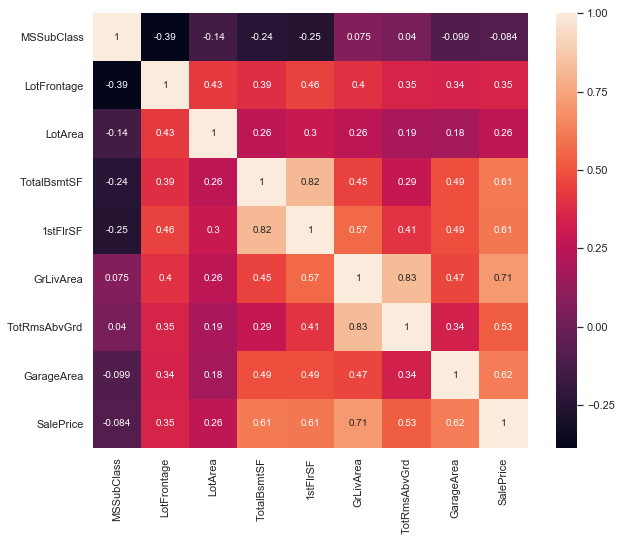

In [21]:
#creating a heatmap to display correlations between LotFrontage and other variables. 
#We are restricting this graph to variables that have at least a .3 correlation. 
correlations = train.corr()
LotFrontageCorr = correlations.index[abs(correlations['LotFrontage'])>.3]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train[LotFrontageCorr].corr(), square=True, annot=True)


In [22]:
correlations.LotFrontage.head(20)

Id             -0.010601
MSSubClass     -0.386347
LotFrontage     1.000000
LotArea         0.426095
OverallQual     0.251646
OverallCond    -0.059213
YearBuilt       0.123349
YearRemodAdd    0.088866
MasVnrArea      0.193458
BsmtFinSF1      0.233633
BsmtFinSF2      0.049900
BsmtUnfSF       0.132644
TotalBsmtSF     0.392075
1stFlrSF        0.457181
2ndFlrSF        0.080177
LowQualFinSF    0.038469
GrLivArea       0.402797
BsmtFullBath    0.100949
BsmtHalfBath   -0.007234
FullBath        0.198769
Name: LotFrontage, dtype: float64

From this and the heatmap, we can see that LotArea is the most highly correlated with LotFrontage. Using this information, we will put LotArea in bins to quasi-categorize it. After that, we want to fill in our missing variables with the means of the bins to which their LotArea corresponds.

For example, if one house had a LotArea of 55 sq. ft, then we would look for the bin that contained 55 sq ft, retrieve the median LotFrontage value for that bin, and assign it to our house with the missing value. We will use median to avoid the bias that an outlier could bring into our data.

In [23]:
train["BinnedArea"] = pd.qcut(train['LotArea'], 10)

In [24]:
test["BinnedArea"] = pd.qcut(test['LotArea'], 10)

In [25]:
train.BinnedArea.head(5)

0      (8063.7, 8793.4]
1     (9478.5, 10198.2]
2    (11066.5, 12205.8]
3     (9478.5, 10198.2]
4    (12205.8, 14381.7]
Name: BinnedArea, dtype: category
Categories (10, interval[float64]): [(1299.999, 5000.0] < (5000.0, 7078.4] < (7078.4, 8063.7] < (8063.7, 8793.4] ... (10198.2, 11066.5] < (11066.5, 12205.8] < (12205.8, 14381.7] < (14381.7, 215245.0]]

In [26]:
test.BinnedArea.head(5)

0    (10940.2, 12194.4]
1    (14259.0, 56600.0]
2    (12194.4, 14259.0]
3     (9399.0, 10125.8]
4      (4793.0, 6958.4]
Name: BinnedArea, dtype: category
Categories (10, interval[float64]): [(1469.999, 4793.0] < (4793.0, 6958.4] < (6958.4, 7843.8] < (7843.8, 8640.0] ... (10125.8, 10940.2] < (10940.2, 12194.4] < (12194.4, 14259.0] < (14259.0, 56600.0]]

In [27]:
train['LotFrontage'] = train.groupby(train['BinnedArea'])['LotFrontage'].transform(lambda x: x.fillna(x.median))

In [28]:
test['LotFrontage'] = test.groupby(test['BinnedArea'])['LotFrontage'].transform(lambda x: x.fillna(x.median))

Now that we've used our bins to fit LotFrontage with believable values, we're going to drop it. 

In [29]:
train = train.drop("BinnedArea", axis =1)
test = test.drop("BinnedArea", axis =1)


In [30]:
#finding remaining missing values
train.isnull().sum().sort_values(ascending=False).head(9)

FireplaceQu     690
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
SalePrice         0
dtype: int64

In [31]:
#finding remaining missing values
test.isnull().sum().sort_values(ascending=False).head(9)

FireplaceQu     730
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
dtype: int64

It looks like we have succesfully filled in the values for our LotFrontage. Moving onto other variables now.

Let's go from the top of the list down. BsmtFinType2 has some missing values, but this can be explained from the notes that came with our data. Missing values for this variable are just NA, but Python interpretted them as missing when the data was imported. 

In [32]:
#replacing missing values with "NA"
train.BsmtFinType2 = train.BsmtFinType2.fillna("No Basement")

In [33]:
#replacing missing values with "NA"
test.BsmtFinType2 = test.BsmtFinType2.fillna("No Basement")

Net variable on the list is the MasVnrType. From out data description, we know that these values are missing if a finish does not exist in the house. Therefore, we can lable these as "NA". Corresponding to this, MasVnrArea is the area of MasVnrType, so we can replace these with 0.

In [34]:
train.MasVnrType = train.MasVnrType.fillna("No Finish")
train.MasVnrArea = train.MasVnrArea.fillna(0)

In [35]:
test.MasVnrType = test.MasVnrType.fillna("No Finish")
test.MasVnrArea = test.MasVnrArea.fillna(0)

In [36]:
#finding remaining missing values
train.isnull().sum().sort_values(ascending=False).head(6)

FireplaceQu     690
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
SalePrice         0
dtype: int64

In [37]:
#finding remaining missing values
test.isnull().sum().sort_values(ascending=False).head(6)

FireplaceQu     730
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
MSZoning          4
dtype: int64

In [38]:
#finding values of our categorical variable BsmtExposure
train.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [39]:
train.BsmtExposure.isnull().sum()

38

In [40]:
train.BsmtExposure = train.BsmtExposure.fillna("No Basement")

Now for BsmtQual -- missing values also indicate no basement

In [41]:
train.BsmtQual = train.BsmtQual.fillna("No Basement")
test.BsmtQual = test.BsmtQual.fillna("No Basement")

BsmtFinType1 is the finish type of the basement, missing indicates no basement.

In [42]:
train.BsmtFinType1 = train.BsmtFinType1.fillna("No Basement")

In [43]:
test.BsmtFinType1 = test.BsmtFinType1.fillna("No Basement")

BsmtCond is the condition of basement, missing values are for houses simply missing basements.

In [44]:
train.BsmtCond = train.BsmtCond.fillna("No Basement")
test.BsmtCond = test.BsmtCond.fillna("No Basement")

Now I will take care of Electrical, then FireplaceQu.

In [45]:
#finding values of our categorical variable Electrical
traintest.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [46]:
train.Electrical = train.Electrical.fillna("SBrkr")
test.Electrical = test.Electrical.fillna("SBrkr")

In [47]:
train.FireplaceQu = train.FireplaceQu.fillna("No Fireplace")
test.FireplaceQu = test.FireplaceQu.fillna("No Fireplace")

In [48]:
#finding remaining missing values
train.isnull().sum().sort_values(ascending=False).head(20)
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtExposure    44
MSZoning         4
Functional       2
BsmtFullBath     2
Utilities        2
BsmtHalfBath     2
GarageArea       1
BsmtFinSF2       1
BsmtUnfSF        1
SaleType         1
Exterior2nd      1
Exterior1st      1
KitchenQual      1
GarageCars       1
TotalBsmtSF      1
BsmtFinSF1       1
Condition2       0
MSSubClass       0
LotFrontage      0
LotArea          0
dtype: int64

To spare more lines of near-pointless comments, I will be correcting for any variable that is categorical and simply missing the given feature, or that is not an appropriate value to give the variable, the most common entry will be assigned instead.

In [49]:
categorical_train = [var for var in train.columns if train[var].dtype=='O'] #making list of categorical variables, code taken from https://www.kaggle.com/solegalli/feature-engineering-for-house-price-modelling
categorical_test = [var for var in test.columns if train[var].dtype=='O']

In [50]:
#filling missing values in categorical variables that have remaining missing values
for x in categorical_train:
    train[x] = train[x].fillna(train[x].value_counts().index[0])

for x in categorical_test:
    test[x] = test[x].fillna(test[x].value_counts().index[0])

In [51]:
train.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      0
ExterCond      0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
Foundation     0
dtype: int64

In [52]:
test.isnull().sum().sort_values(ascending=False).head(10)

BsmtFullBath    2
BsmtHalfBath    2
TotalBsmtSF     1
GarageArea      1
BsmtUnfSF       1
BsmtFinSF1      1
GarageCars      1
BsmtFinSF2      1
LandContour     0
Exterior1st     0
dtype: int64

Now I will work on the continuous variables in a similar manner. I will also assign these values the mean value. If more observations were missing, I would take more careful measures to implement the solution I used for LotFrontage. 1 or 2 variables being assigned the median does not bother me too much.

In [53]:
#making list of continuous variables, code taken from https://www.kaggle.com/solegalli/feature-engineering-for-house-price-modelling
continuous_train = [var for var in train.columns if train[var].dtype==np.float64] 
continuous_test = [var for var in test.columns if test[var].dtype==np.float64] 

In [54]:
#filling missing values in continuous variables that have remaining missing values
for x in continuous_train:
        train[x] = train[x].fillna(train[x].median())

In [55]:
#filling missing values in continuous variables that have remaining missing values
for x in continuous_test:
        test[x] = test[x].fillna(test[x].median())

In [56]:
train.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      0
ExterCond      0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
Foundation     0
dtype: int64

In [57]:
test.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition    0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
dtype: int64

It looks like we were successful in filling missing values. However, missing values are not the only concern of our dataset. Outliers may be a problem, but it is likely that other variables should exist in our dataset that don't. Looking at the dataset, it appears that one variable exists in a disaggregated form: house size.

The variable that we should consider that does not exist in one consolidated form in our dataset is the area of the house in square feet. With any real house sale, the information we base our understanding of the value of the house on is bedrooms, bathrooms, and size in square feet. Some extremely luxurious houses may have only two or three large bedrooms, but that is far less likely than the same quality of house having a high amount bedrooms and bathrooms. 

In [58]:
#creating total square feet variable
train['SqFeet'] = train.TotalBsmtSF + train['1stFlrSF'] + train['2ndFlrSF']

In [59]:
test['SqFeet'] = test.TotalBsmtSF + test['1stFlrSF'] + test['2ndFlrSF']

Now that we've effectively cleaned our data by imputing values for any missing observations, it is important that we codify the categorical variables in our data. Codifying these variables will allow our models to leverage them, but if we were to leave them in string values, they would have no effect.

In [60]:
#code for dropping categorical variables during a stressful period.
train = train.drop(categorical_train, axis = 1)
test = test.drop(categorical_test, axis = 1)

In [61]:
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)

Now that we have dropped our problem variables, I will now tackle the outliers in our train data. Although it is likely that outliers exist in my test set, I will not manipulate that set so that the results of my models will be more believable.

Text(0,0.5,'Percent of dataset (Houses)')

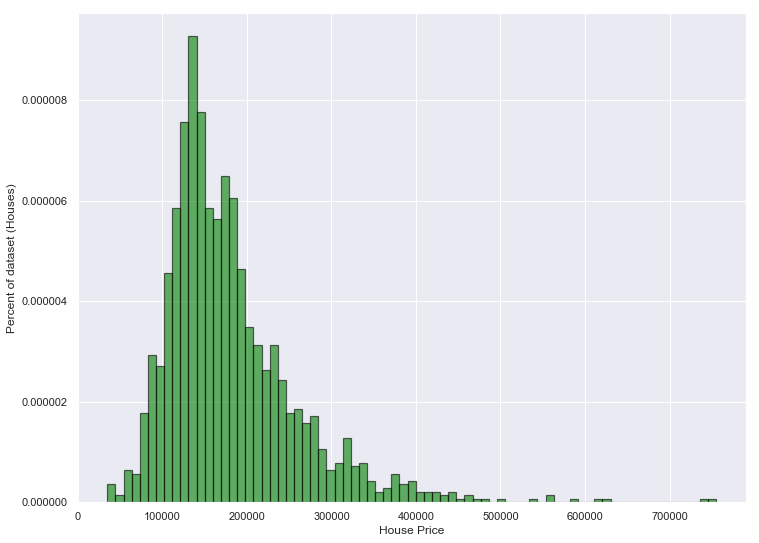

In [62]:
#plotting a histogram for some descriptive data on SalePrice
quant_bins = 75
fig, ax = plt.subplots(figsize=(12,9))
n, bins, patches = ax.hist(train.SalePrice, quant_bins, alpha=0.6,normed=1,edgecolor='black', linewidth=1.2, color='green')
ax.set_xlabel("House Price")
ax.set_ylabel("Percent of dataset (Houses)")

It appears that most of our houses have lower prices, centering around $175,000 or so. This gives us a good starting point to begin taking apart the rest of our data.

Before I fire off any other graphs, I think it would be useful to visualize a few graphs of variables that are highly correlated with SalePrice.

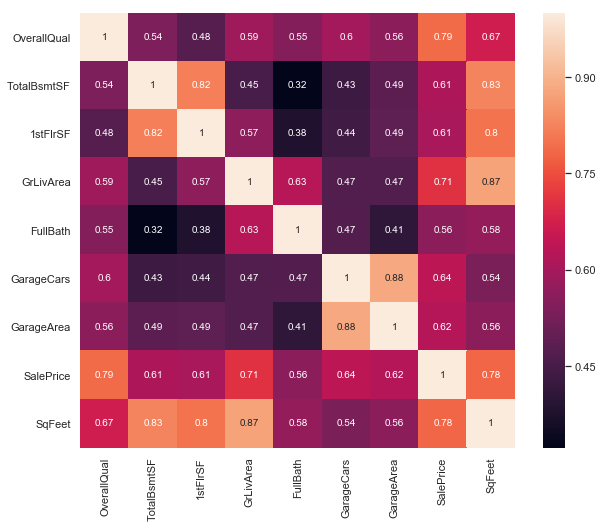

In [63]:
#creating a heatmap to display correlations between SalePrice and other variables. 
#We are restricting this graph to variables that have at least a .3 correlation. 
correlation_sp = train.corr()
SalePriceCorr = correlation_sp.index[abs(correlation_sp['SalePrice'])>.55]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train[SalePriceCorr].corr(), square=True, annot=True)

Looking across the SalePrice Row, it appears that GrLivArea, OverallQual, YearRemodAdd, and any variable with house size in Square Feet are relatively highly correlated with SalePrice. Let's visualize a few of these graphs as scatterplots to visualize their relationships.

Additionally, now that we have our data cleaned in terms of missing values, we need to look for outliers. These outliers won't be determined from simply looking at expensive houses. Instead, we need to look for houses that have uncharacteristically high prices given their other features.

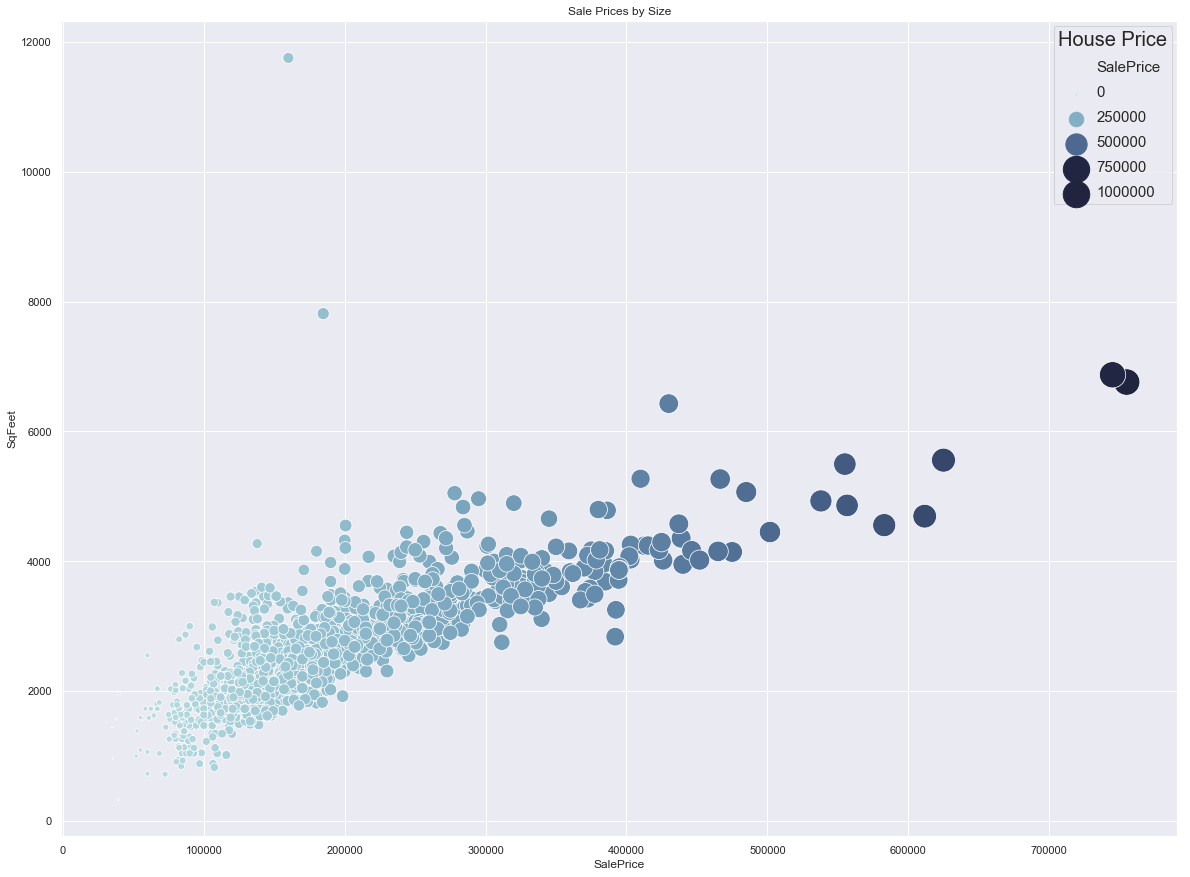

In [64]:
#changing seaborn plot size
plt.subplots(figsize=(20,15))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

#creating scatter of house size and price
scatterplot_train = sns.scatterplot(x=train.SalePrice, y=train.SqFeet, 
                                    size=train.SalePrice, 
                                    palette=cmap,
                                    hue=train.SalePrice,
                                    sizes=(1, 700), 
                                    data=train,)

#modifying size of legend
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='House Price')
plt.setp(scatterplot_train.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(scatterplot_train.get_legend().get_title(), fontsize='20') # for legend title
#setting title for plot
plt.title('Sale Prices by Size');

Only one or two points look suspect here, so let's try to visualize them better. 

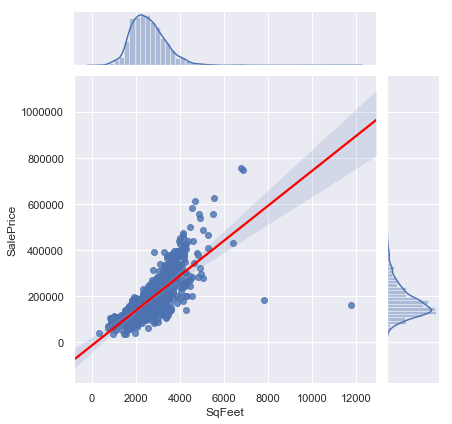

In [65]:
r = sns.jointplot(x="SqFeet", y="SalePrice", data=train, kind ='reg')

regline = r.ax_joint.get_lines()[0]
regline.set_color('red')

A few of these observations appear to be suspect, namely those with relatively low selling price compared to their size. Let's drop those observations because they lie so far outside the distribution of our data. 

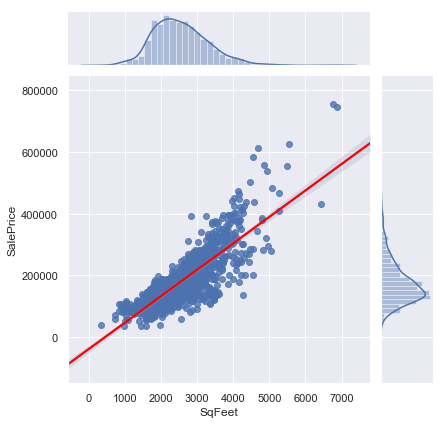

In [66]:
train = train.drop(train[(train['SqFeet']>7600) & (train['SalePrice']<200000)].index)
#sns.lmplot(x="SalePrice", y="SqFeet", data=train, robust=True, ci=None, scatter_kws={"s": 80}, x_jitter=.0005)
                        
r = sns.jointplot(x="SqFeet", y="SalePrice", data=train, kind ='reg')

regline = r.ax_joint.get_lines()[0]
regline.set_color('red')

Looks like the outliers were succesfully eliminated. Now let's observe the relationship between OverallQual and SalePrice:

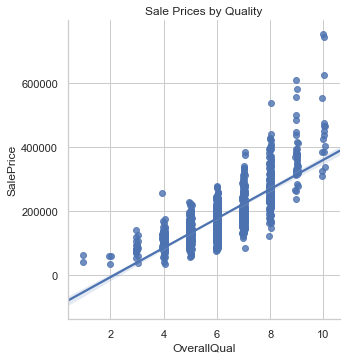

In [67]:
#adding another dimension to our SalesPrice data, considering the knowledge our heatmap of other correlations brings to the table
sns.set_style("whitegrid")

sns.lmplot(x="OverallQual", y="SalePrice", data=train, x_jitter=.05);
plt.title('Sale Prices by Quality');


No observations appear completely out of line here, so we will continue to YearRemodAdd.

For our final graphs, I want to look at the relationship between SalePrice and YearRemodAdd:

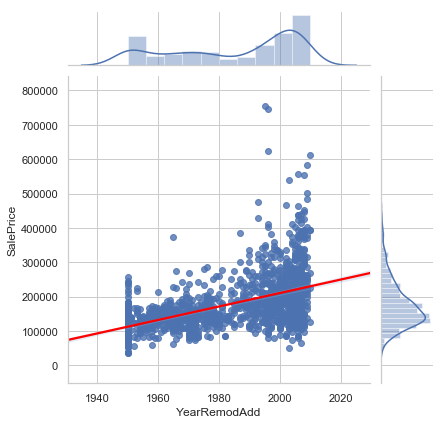

In [68]:
g = sns.jointplot(x="YearRemodAdd", y="SalePrice", data=train, kind ='reg')

regline = g.ax_joint.get_lines()[0]
regline.set_color('red')

Again, there seems to be a significantly positive relationship between SalePrice and YearRemodAdd. Although a few points look a bit out of place, nothing about this graph would indicate that those values make those SalePrices outliers a manner that makes the SalePrice out of the ordinary. 

# Now that we've taken care of our data in every possible way, let's move onto the models. To make my predictions for SalePrice, I am going to use a Linear Regression, Bayesian Ridge, and Lasso Regression.

Let's create a loop for all of our models, loop through each and see which returns the best results with a standard set of hyperparameters. 

In [69]:
#create a scoring method for our three models
def return_rmse(model, x, y):
    scores = np.sqrt(-cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error'))
    return scores.mean()

In [70]:
#Function from sklearn for plotting learning curves and model results
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
    train_scores_std = np.std(np.sqrt(-train_scores), axis=1)
    test_scores_mean = np.mean(np.sqrt(-test_scores), axis=1)
    test_scores_std = np.std(np.sqrt(-test_scores), axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [71]:

y = train.SalePrice
x = train.drop("SalePrice", axis = 1)

Lasso : RMSE = 30653.0444389


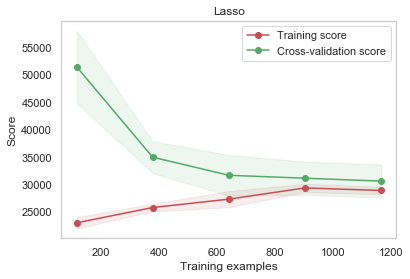

LinearRegression : RMSE = 30653.04459


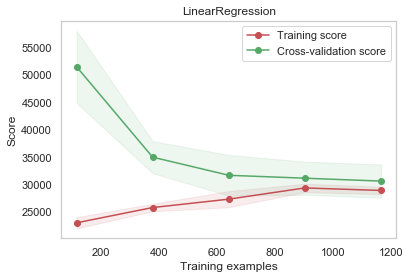

BayesianRidge : RMSE = 32651.6369272


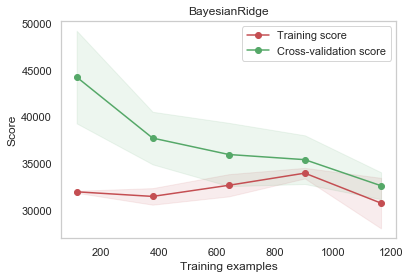

In [72]:
lr = Lasso(alpha = .0005)
lm = LinearRegression()
br = BayesianRidge()
modeltypes = [lr, lm, br]
for model in modeltypes:
    scores = return_rmse(model, x, y)
    print(model.__class__.__name__,": RMSE =", scores)
    plot_learning_curve(model, model.__class__.__name__, x, y, cv = 5)
    plt.show()

In [73]:
scaler = StandardScaler()
pipe = make_pipeline(scaler, lr)
pipe.fit(x,y)
predictions = pipe.predict(test)

Getting answer in correct format before submission:

In [74]:
submit = pd.DataFrame({'Id':Id,'SalePrice':predictions})
submit.to_csv("submission.csv",index=False)